# Lọc và nhân chập (Image Filtering, Convolutions and Cross-correlations)

Trong bài tập này ta sẽ làm quen với các thao tác lập trình cơ bản trong Python dành cho xử lý ảnh. Các thư viện sẽ được sử dụng trong bài tập này gồm có: os, numpy, opencv.

### Kết nối tới Google drive trong trường hợp chạy trên colab, bỏ qua bước này nếu chạy local

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/'My Drive'/Code/ImagesProcessing

/content/drive/My Drive/Code/ImagesProcessing


In [3]:
from IPython.display import Image
import os
import numpy as np
import cv2
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import NoNorm
from scipy import signal

Convolution 1D

In [ ]:
signal1D = np.array([3,4,5,6],np.uint8)
print('Input:\n',signal1D)
kernel1D = np.array([2,1,0])
print('Kernel:\n',kernel1D)
con=signal.convolve(signal1D, kernel1D, mode='full', method='direct')
print('Result:\n',con)

Input:
 [3 4 5 6]
Kernel:
 [2 1 0]
Result:
 [ 6 11 14 17  6  0]


2D Convolution 

In [ ]:
Roi = np.array([
    [1,8,1],
    [2,10,2],
    [1,8,1]
])
print('Input:\n',Roi)
kernel = np.array([
    [-1,0,1],
    [-4,0,4],
    [-1,0,1]
])
print('Kernel:\n',kernel)
con=signal.convolve2d(Roi, kernel, mode='same', boundary='fill', fillvalue=0)
print('Result:\n',con)

Input:
 [[ 1  8  1]
 [ 2 10  2]
 [ 1  8  1]]
Kernel:
 [[-1  0  1]
 [-4  0  4]
 [-1  0  1]]
Result:
 [[-42   0  42]
 [-56   0  56]
 [-42   0  42]]


In [ ]:
Roi = np.array([
    [1,2,3,2,1],
    [4,5,6,5,4],
    [7,8,9,8,7]
])
print (Roi.shape)
print('Input:\n',Roi)
kernel = np.array([
    [-1,0,-1],
    [0,0,0],
    [1,0,1]
])
print('Kernel:\n',kernel)
con=signal.convolve2d(Roi, kernel, mode='same', boundary='fill', fillvalue=0)
print('Result:\n',con)

(3, 5)
Input:
 [[1 2 3 2 1]
 [4 5 6 5 4]
 [7 8 9 8 7]]
Kernel:
 [[-1  0 -1]
 [ 0  0  0]
 [ 1  0  1]]
Result:
 [[ -5 -10 -10 -10  -5]
 [ -6 -12 -12 -12  -6]
 [  5  10  10  10   5]]


(3, 5)
Input:
 [[1 2 3 2 1]
 [4 5 6 5 4]
 [7 8 9 8 7]]
[[-1  0 -1]
 [ 0  0  0]
 [ 1  0  1]]
[[ 1  0  1]
 [ 0  0  0]
 [-1  0 -1]]
[[ -5 -10 -10 -10  -5]
 [ -6 -12 -12 -12  -6]
 [  5  10  10  10   5]]
[[ 0 -1  0]
 [-1  5 -1]
 [ 0 -1  0]]


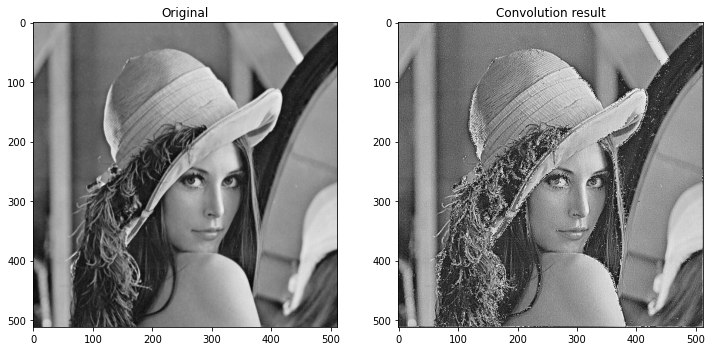

In [ ]:
def convolve2d(image, kernel):
    """
    This function which takes an image and a kernel and returns the convolution of them.

    :param image: a numpy array of size [image_height, image_width].
    :param kernel: a numpy array of size [kernel_height, kernel_width].
    :return: a numpy array of size [image_height, image_width] (convolution output).
    """
    # Flip the kernel
    kernel = np.flipud(np.fliplr(kernel))
    print (kernel)
    # convolution output
    output = np.zeros_like(image)

    # Add zero padding to the input image
    image_padded = np.zeros((image.shape[0] + 2, image.shape[1] + 2))
    #shape[1]: width
    #shape[0]:height 
    image_padded[1:-1, 1:-1] = image
    # Loop over every pixel of the image
    for x in range(image.shape[1]):
        for y in range(image.shape[0]):
            # element-wise multiplication of the kernel and the image
            output[y, x]=(kernel * image_padded[y: y+3, x: x+3]).sum()

    return output

# Test with the same matrix
Roi = np.array([
    [1,2,3,2,1],
    [4,5,6,5,4],
    [7,8,9,8,7]
])
print (Roi.shape)
print('Input:\n',Roi)
KERNEL = np.array([
    [-1,0,-1],
    [0,0,0],
    [1,0,1]
])
print(KERNEL)
results = convolve2d(Roi, kernel=KERNEL)
print(results)
#Test wh image
KERNEL = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
input_image=cv2.imread('images/colorlena.jpg',cv2.IMREAD_GRAYSCALE)
image_sharpen=convolve2d(input_image, kernel=KERNEL)
cv2.imwrite('sharpened_image.jpg', image_sharpen)
plt.figure(figsize=(12,12))
plt.subplot(121)
plt.title('Original')
plt.imshow(input_image,cmap='gray')
plt.subplot(122)
plt.title('Convolution result')
plt.imshow(image_sharpen,cmap='gray')

Thêm nhiễu muối tiêu vào ảnh

In [4]:
#https://www.geeksforgeeks.org/add-a-salt-and-pepper-noise-to-an-image-with-python/

import random 
def add_noise(img): 
    # Getting the dimensions of the image 
  row,col = img.shape     
    # Randomly pick some pixels in the 
    # image for coloring them white 
    # Pick a random number between 300 and 10000 
  number_of_pixels = random.randint(300, 10000) 
  for i in range(number_of_pixels): 
        # Pick a random y coordinate 
    y_coord=random.randint(0, row - 1) 
        # Pick a random x coordinate 
    x_coord=random.randint(0, col - 1) 
    img[y_coord][x_coord] = 255
  number_of_pixels = random.randint(300 , 10000) 
  for i in range(number_of_pixels): 
   # Pick a random y coordinate 
    y_coord=random.randint(0, row - 1) 
   # Pick a random x coordinate 
    x_coord=random.randint(0, col - 1) 
   # Color that pixel to black 
    img[y_coord][x_coord] = 0
  return img
  
img = cv2.imread('images/colorlena.jpg',cv2.IMREAD_GRAYSCALE) 
print (img.shape) 
#Storing the image 
cv2.imwrite('images/lena-salt-and-pepper.jpg', add_noise(img))

(512, 512)


True

### Lọc trung bình

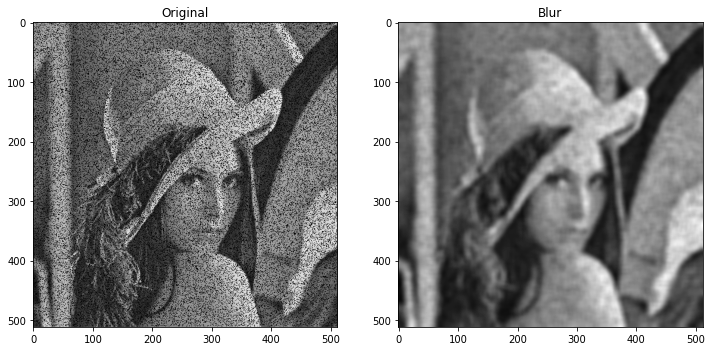

In [6]:
plt.figure(figsize=(12,12))
gray = cv2.imread('images/saltandpepperlena.jpg',cv2.IMREAD_UNCHANGED)
plt.subplot(121)
plt.title('Original')
plt.imshow(gray,cmap='gray')

new_gray = cv2.blur(gray, (11,11))
new_gray = cv2.blur(new_gray, (5,5))
plt.subplot(122)
plt.title('Blur')
plt.imshow(new_gray,cmap='gray')
plt.show()

### Lọc trung vị hoặc Gaussian

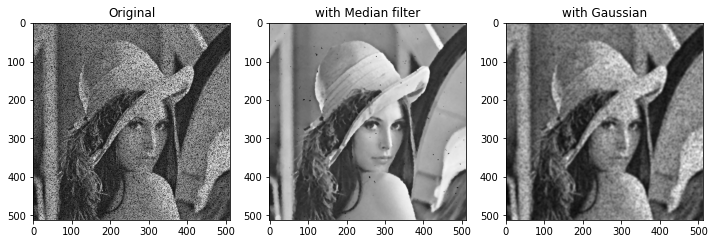

In [9]:
plt.figure(figsize=(12,12))
gray = cv2.imread('images/saltandpepperlena.jpg',cv2.IMREAD_UNCHANGED)
plt.subplot(131)
plt.gca().set_title('Original')
plt.imshow(gray,cmap='gray')
new_gray_median = img = cv2.medianBlur(gray, 5)
new_gray_gauss = cv2.GaussianBlur(gray, (11, 11), 0)
new_gray_blur = cv2.blur(gray, (11,11))
plt.subplot(132)
plt.gca().set_title('with Median filter')
plt.imshow(new_gray_median,cmap='gray')
plt.subplot(133)
plt.gca().set_title('with Gaussian')
plt.imshow(new_gray_gauss,cmap='gray')
plt.show()

### Sử dụng nhân chập, cho phép người dùng tự thiết kế ma trận lọc (mẫu)

[[160 144 144 143 141]
 [128 104 100 101 100]
 [123  92  88  90  91]
 [137 100  97 102 107]
 [135  94  94 101 109]]
[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]
[[124 124 116 114 115]
 [121 120 112 111 111]
 [109 108  97  97  98]
 [107 107  95  98  99]
 [111 110  99 102 104]]


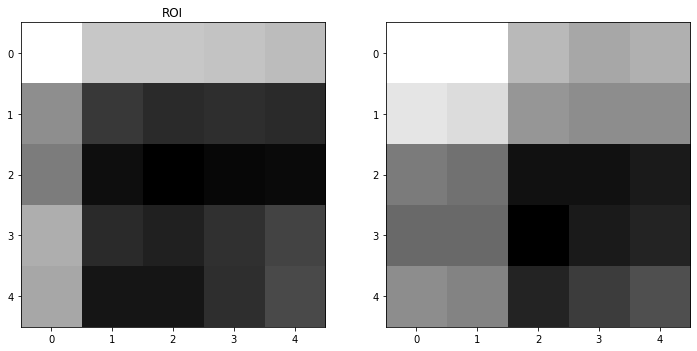

In [ ]:
plt.figure(figsize=(12,12))
gray = cv2.imread('images/Girl2.jpg',cv2.IMREAD_UNCHANGED)
plt.subplot(121)
ROI=gray[:5,:5]
plt.gca().set_title('ROI')
print(ROI)
plt.imshow(ROI,cmap='gray')
kernel = np.ones((3,3),np.float32)/9
print (kernel)
new_gray = cv2.filter2D(ROI, -1, kernel,cv2.BORDER_ISOLATED) 
# -1 means the output image will have the same depth as the source
#BORDER_ISOLATED Python: cv.BORDER_ISOLATED do not look outside of ROI
print(new_gray)
plt.subplot(122)
plt.imshow(new_gray,cmap='gray')
plt.show()

### Sử dụng nhân chập với ảnh màu

[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


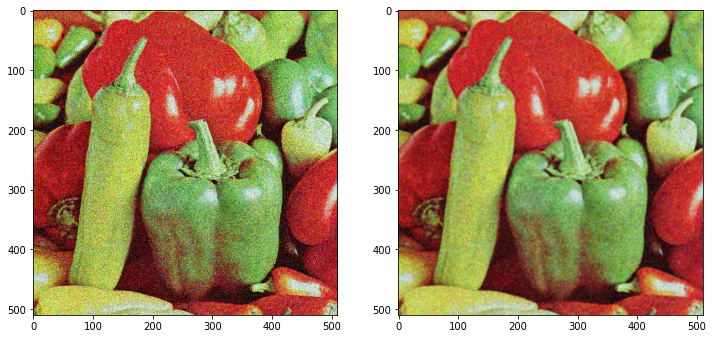

In [ ]:
plt.figure(figsize=(12,12))
img = cv2.imread('images/Fruit.png')
img1=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.subplot(121)
plt.imshow(img1)
kernel = np.ones((3,3),np.float32)/9
print(kernel)
img2 = cv2.filter2D(img1, -1, kernel)

plt.subplot(122)
plt.imshow(img2)
plt.show()

### Ma trận lọc được thiết kế với nhiều mục đích khác

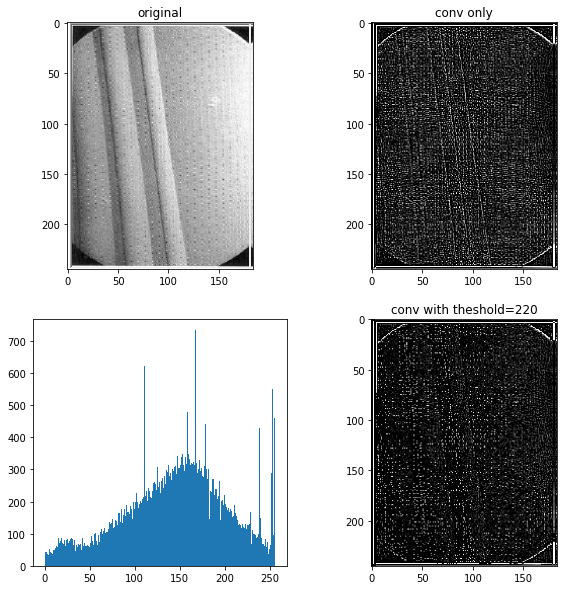

In [ ]:
# Làm nổi các điểm trong ảnh
img = cv2.imread("images/Vai.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(10,10))
plt.subplot(221)
plt.gca().set_title('original')
plt.imshow(gray, cmap='gray',norm=NoNorm())

kernel = np.array([
    [-1,-1,-1],
    [-1, 8,-1],
    [-1, -1,-1]
])
img1 = cv2.filter2D(gray, -1, kernel)
plt.subplot(222)
plt.gca().set_title('conv only')
plt.imshow(img1, cmap='gray',norm=NoNorm())

diff=abs(gray-img1)
plt.subplot(223)
plt.hist(diff.ravel(),256,[0,256])
skip=diff>100 # chỉ giữ những điểm có độ lệch mức xám so với mức xám gốc > 220
img3=img1*skip
plt.subplot(224)
plt.gca().set_title('conv with theshold=220')
plt.imshow(img3, cmap='gray',norm=NoNorm())
plt.show()

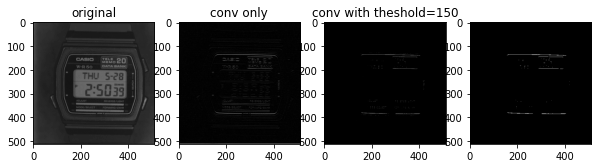

In [ ]:
# Phát hiện dường thẳng
img = cv2.imread("images/Watch_01.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(10,10))
plt.subplot(141)
plt.gca().set_title('original')
plt.imshow(gray, cmap='gray',norm=NoNorm())

kernel = np.array([
    [-1,-1,-1],
    [ 2, 2, 2],
    [-1, -1,-1]
])
img1 = cv2.filter2D(gray, -1, kernel)
plt.subplot(142)
plt.gca().set_title('conv only')
plt.imshow(img1, cmap='gray',norm=NoNorm())

dif=gray-img1
skip=dif>150 # chỉ giữ những điểm có độ lệch mức xám so với mức xám gốc > 220
img3=img1*skip
plt.subplot(143)
plt.gca().set_title('conv with theshold=150')
plt.imshow(img3, cmap='gray',norm=NoNorm())

plt.subplot(144)
ret,b_img = cv2.threshold(img3,105,255,cv2.THRESH_BINARY)
plt.imshow(b_img, cmap='gray',norm=NoNorm())
cv2.imwrite("images_test/Watch_output.jpg", b_img)
plt.show()